<a href="https://colab.research.google.com/github/Ismail-Armutcu/Algorithms-for-Interactive-Sytems/blob/main/MMI513_PA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MMI-513 Programming Assignment #3**
# Procedural Content Generation
## Maze Generation
### Prims Maze Implementation

- İsmail Hakkı Armutcu
- 2374395



- Preamble is where we import the Python modules that we will use

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

plt.rcParams['figure.figsize'] = [7.5, 7.5] # This is to adjust the image size on Jupyter

- Utility functions for undirected connectection graph function

In [7]:
  def undirectedconnectiongraph(xnum=30, ynum=30):
    G = {'V':[], 'E':[]} # We will use a dictionary for simplicity
    for xind in range(xnum):
      for yind in range(ynum):
        G['V'].append((xind, yind))

    # Traverse north first
    for pt in G['V']:
      vtn = north(pt[0], pt[1])
      if isvertex(vtn, G['V']):
        G['E'].append((pt, vtn))

    # Traverse east second
    for pt in G['V']:
      vte = east(pt[0], pt[1])
      if isvertex(vte, G['V']):
        G['E'].append((pt, vte))
    return G

  def north(xind, yind):
    node = (xind, yind + 1)
    return node

  def south(xind, yind):
    node = (xind, yind - 1)
    return node

  def east(xind, yind):
    node = (xind + 1, yind)
    return node

  def west(xind, yind):
    node = (xind - 1, yind)
    return node

  def isvertex(node, vertices):
    return node in vertices

  def plotgraph(G, vertexflag=True):
    for e in G['E']:
      vec = np.array([e[1][0]-e[0][0], e[1][1]-e[0][1]])
      ort = np.array([-vec[1], vec[0]])
      olen = np.linalg.norm(ort)
      ort = ort / olen
      sum = np.array([(e[1][0]+e[0][0])/2, (e[1][1]+e[0][1])/2])
      startp = sum - ort / 2
      endp = sum + ort / 2
      plt.plot((startp[0], endp[0]), (startp[1], endp[1]), 'k', linewidth=10)
      if vertexflag:
        for v in G['V']:
          plt.plot(float(v[0]), float(v[1]), 'ro')
    plt.axis('square')
    plt.show()

  def randomnode(vertices):
    vertices = list(vertices)
    randind = np.random.randint(0, len(vertices))
    return vertices[randind]

# Utility functions for Prims Maze algorithm

In [8]:
def inSet(element,Set):  # Determine if the given element is in the given set
  for s in Set:          # Returns true if found
    if(element == s):
      return True
  return False

def endIntersect(set1,set2): # Determine if two given ends intersects
  count =0
  for s1 in set1:
    for s2 in set2:
      if(s1 == s2):
         count += 1
  return count

def intersectionSize(l, C): # Determine the intersection length
  count = 0
  if(inSet(l[0],C)):
    count +=1
  if(inSet(l[1],C)):
    count +=1
  return count

## Prims Maze

In [9]:
def pimmsmaze(xnum=30, ynum=30):
  assert(type(xnum) == int and type(ynum) == int) # Assertions
  assert(xnum > 0 and ynum > 0)                   # Both inputs must be positive integers

  G = undirectedconnectiongraph(xnum, ynum)       # Construct the undirected connection graph with the given parameters
  W = set(G['E'].copy())                          # Initialize walls
  V = set(G['V'].copy())                          # Initialize edges

  L = set()                                       # Set of walls to check out, initally empty
  C = set()                                       # Visited Cells, initally empty
  c = randomnode(V)                               # select c in V randomly

  for w in W:                                     # Initalize L with the neighbors of c
    if(inSet(c,w)):
      L.add(w)

  while len(L):
    l = randomnode(L)                           # Select l in L randomly
    if(intersectionSize(l,C) <=1):                          # |ends(l) n C| <=1
      C.add(l[0])                               # C <- C u ends(l)
      C.add(l[1])
      W.remove(l)                               # Remove the wall
      for w in W:
        if(endIntersect(l,w)):
          if(inSet(w,L) != True):
            L.add(w)                          # Add the neighbouring walls
    L.remove(l)

  P = {'V':[], 'E':[]}
  P['V'] = G['V'].copy()
  P['E'] = list(W)
  return P

# Plotting the Prims Maze

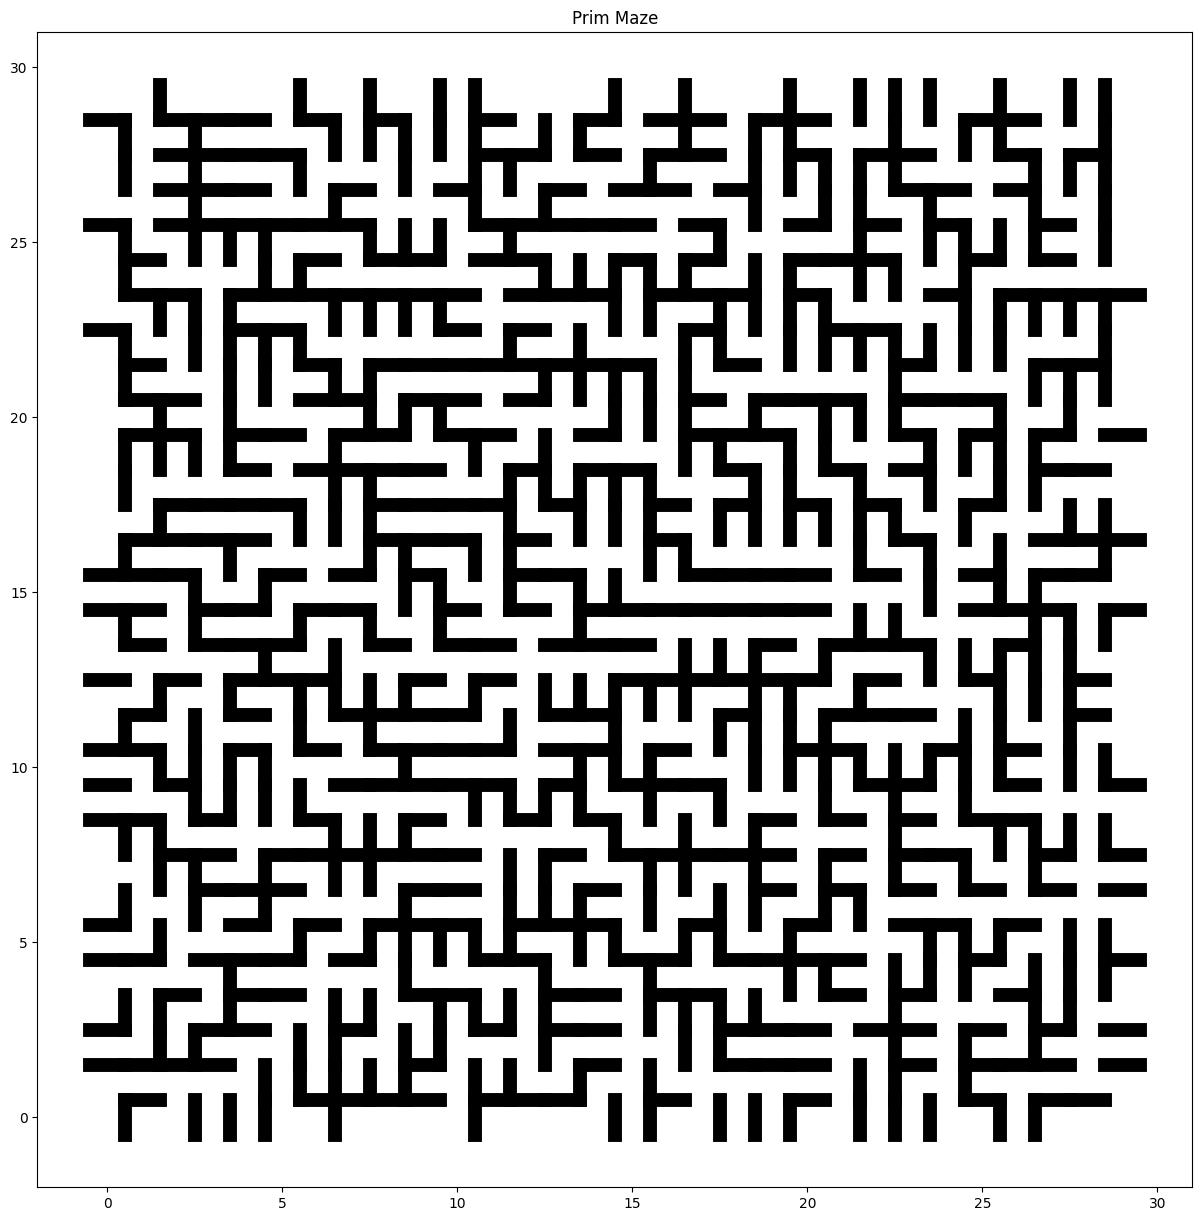

In [11]:
P = pimmsmaze(30, 30)     # Construct the Prims Maze


plt.title('Prim Maze')
plt.rcParams['figure.figsize'] = [15, 15] # This is to adjust the image size on Jupyter
plotgraph(P, False)     # Plot the Prims Maze